L*_data_4.pklのdeviationをk-means法でclusteringしてみる

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import pickle

In [38]:
l1_path = "../../data/dic/L1_data_4.pkl"
with open(l1_path, "rb") as tf:
    l1_dict = pickle.load(tf)

l1df = pd.DataFrame.from_dict(l1_dict)
l1df.head()

# for dir in l1_dict:
#     print(dir, l1_dict[dir]["deviation_of_volume"], l1_dict[dir]["mean_volume"])

,../input/results/oxdna_random_6/L1/d-3-6-11-12-13/L1_d-3-6-11-12-13_2023-01-27-133719/L1_d-3-6-11-12-13_2023-01-27-133719/,../input/results/oxdna_random_6/L1/d-0-7-9-12-13-15/L1_d-0-7-9-12-13-15_2023-01-27-081137/L1_d-0-7-9-12-13-15_2023-01-27-081137/,../input/results/oxdna_random_6/L1/d-2-5-9-12-15/L1_d-2-5-9-12-15_2023-01-30-184311/L1_d-2-5-9-12-15_2023-01-30-184311/,../input/results/oxdna_random_6/L1/d-1-5-7-8-12-14/L1_d-1-5-7-8-12-14_2023-01-30-031106/L1_d-1-5-7-8-12-14_2023-01-30-031106/,../input/results/oxdna_random_6/L1/d-3-5-6-8-10/L1_d-3-5-6-8-10_2023-01-29-183216/L1_d-3-5-6-8-10_2023-01-29-183216/,../input/results/oxdna_random_6/L1/d-0-2-4-11/L1_d-0-2-4-11_2023-01-30-055316/L1_d-0-2-4-11_2023-01-30-055316/,../input/results/oxdna_random_6/L1/d-5-7-13-15/L1_d-5-7-13-15_2023-01-30-071758/L1_d-5-7-13-15_2023-01-30-071758/,../input/results/oxdna_random_6/L1/d-4-15/L1_d-4-15_2023-01-30-142124/L1_d-4-15_2023-01-30-142124/,../input/results/oxdna_random_6/L1/d-4-15/L1_d-4-15_2023-01-28-030837/L1_d-4-15_2023-01-28-030837/,../input/results/oxdna_random_6/L1/d-1-2-8-9-15/L1_d-1-2-8-9-15_2023-01-30-092907/L1_d-1-2-8-9-15_2023-01-30-092907/,...,../input/results/oxdna_random_6/L1/d-4-8-9-11-12-14/L1_d-4-8-9-11-12-14_2023-01-28-131248/L1_d-4-8-9-11-12-14_2023-01-28-131248/,../input/results/oxdna_random_6/L1/d-0-2-4-7-9-13/L1_d-0-2-4-7-9-13_2023-01-28-142321/L1_d-0-2-4-7-9-13_2023-01-28-142321/,../input/results/oxdna_random_6/L1/d-3-5-9-15/L1_d-3-5-9-15_2023-01-27-184252/L1_d-3-5-9-15_2023-01-27-184252/,../input/results/oxdna_random_6/L1/d-0-2-9/L1_d-0-2-9_2023-01-30-120033/L1_d-0-2-9_2023-01-30-120033/,../input/results/oxdna_random_6/L1/d-4-6-13/L1_d-4-6-13_2023-01-30-065835/L1_d-4-6-13_2023-01-30-065835/,../input/results/oxdna_random_6/L1/d-1-3-6-12/L1_d-1-3-6-12_2023-01-27-133623/L1_d-1-3-6-12_2023-01-27-133623/,../input/results/oxdna_random_6/L1/d-0-5-8-10/L1_d-0-5-8-10_2023-01-27-122849/L1_d-0-5-8-10_2023-01-27-122849/,../input/results/oxdna_random_6/L1/d-0-1-8-15/L1_d-0-1-8-15_2023-01-30-054037/L1_d-0-1-8-15_2023-01-30-054037/,../input/results/oxdna_random_6/L1/d-3-8-9-11-12-14/L1_d-3-8-9-11-12-14_2023-01-27-192303/L1_d-3-8-9-11-12-14_2023-01-27-192303/,../input/results/oxdna_random_6/L1/d-0-3-4-7-9-14/L1_d-0-3-4-7-9-14_2023-01-26-025420/L1_d-0-3-4-7-9-14_2023-01-26-025420/
ratio_of_volume,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
mean_volume,8.810588,8.927824,9.192065,9.126593,8.871402,7.337195,8.179115,8.325877,8.271747,8.611379,...,8.821022,8.737941,9.246634,8.631647,7.637714,8.771796,8.860100,8.666152,8.325148,8.852102
deviation_of_volume,14.430870,17.318102,14.430870,17.318102,14.430870,11.543396,11.543396,5.766281,5.766281,14.430870,...,17.318102,17.318102,11.543396,8.655441,8.655441,11.543396,11.543396,11.543396,17.318102,17.318102


In [39]:
def kmeans(k, X, max_iter=300):
    X_size,n_features = X.shape
    
    # ランダムに重心の初期値を初期化
    centroids  = X[np.random.choice(X_size,k)]
    
    # 前の重心と比較するために、仮に新しい重心を入れておく配列を用意
    new_centroids = np.zeros((k, n_features))
    
    # 各データ所属クラスタ情報を保存する配列を用意
    cluster = np.zeros(X_size)
    
    # ループ上限回数まで繰り返し
    for epoch in range(max_iter):
        
        # 入力データ全てに対して繰り返し
        for i in range(X_size):
            
            # データから各重心までの距離を計算（ルートを取らなくても大小関係は変わらないので省略）
            distances = np.sum((centroids - X[i]) ** 2, axis=1)
            
            # データの所属クラスタを距離の一番近い重心を持つものに更新
            cluster[i] = np.argsort(distances)[0]
            
        # すべてのクラスタに対して重心を再計算
        for j in range(k):
            new_centroids[j] = X[cluster==j].mean(axis=0)
            
        # もしも重心が変わっていなかったら終了
        if np.sum(new_centroids == centroids) == k:
            print("break")
            break
        centroids =  new_centroids
    return cluster

In [40]:
X = [[1, 2, 23], [2, 100, 99], [50, 12, 50]]
X = [[1], [100], [12]]
X = np.array(X)
cluster = kmeans(k=2, X=X, max_iter=300)

break


In [51]:
input_data = l1df.iloc[:,:-1].values
print(input_data)
cluster=kmeans(5, input_data)

[[ 1.          1.          1.         ...  1.          1.
   1.        ]
 [ 8.81058752  8.92782439  9.19206464 ...  8.66615242  8.32514849
   8.85210151]
 [14.43086969 17.31810228 14.43086969 ... 11.54339638 17.31810228
  17.31810228]]


/var/folders/t5/9_w43txj551cpbyq7d7b78000000gn/T/ipykernel_12272/3630184657.py:27: RuntimeWarning: Mean of empty slice.
  new_centroids[j] = X[cluster==j].mean(axis=0)
/Users/hyakuzukamaya/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


Text(0.5, 1.0, 'clustering relust')

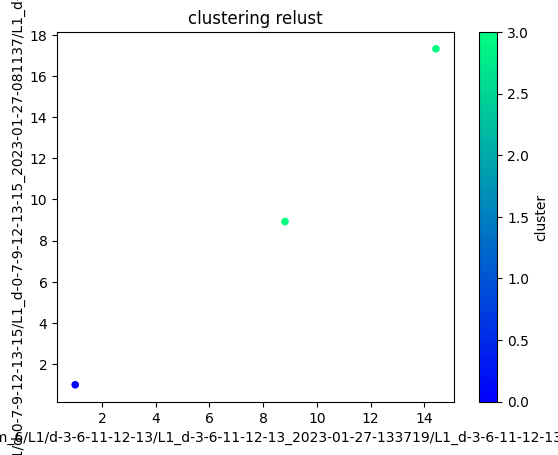

In [52]:
l1df.plot(kind="scatter", x=0,y=1,c="cluster", cmap="winter")
plt.title("clustering relust")